# Option Pricing in the Black-Scholes Model

<img src="bs.webp">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
n = 10000
T = 0.25
S0 = 100
r = 2./100
volatility = 30./100
K = 110
c = 1./100

In [3]:
n_paths = 1000
dt = T/n

S = np.zeros(shape=(n_paths, n))
dW = np.random.normal(0, np.sqrt(dt), size=(n_paths, n))

for i in range(n):
    if i==0:
        S[:,i] = S0
    else:
        S[:,i] = np.random.lognormal(np.log(S[:,i-1]) + (r-c-volatility**2/2)*dt, 
                                     volatility*np.sqrt(dt))

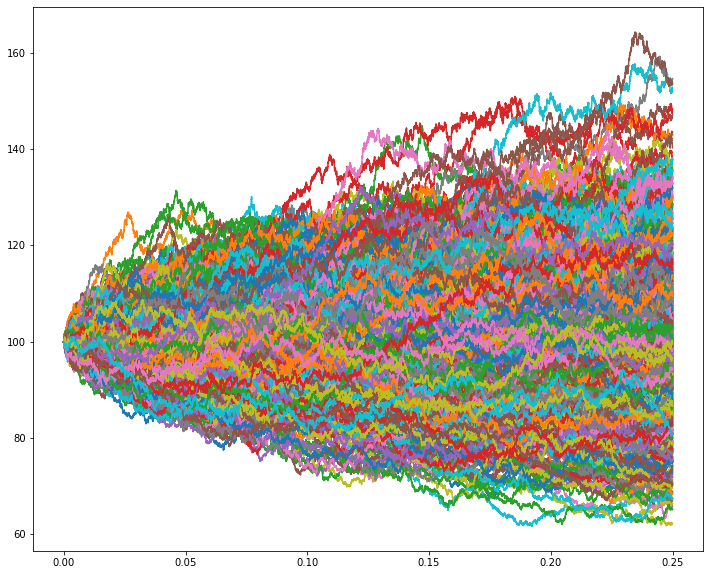

In [4]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
time = np.arange(0, T, dt)
for i in range(n_paths):
    ax.plot(time, S[i])

-----

In [5]:
def monte_carlo_pricing(prices, r, T, payoff):
    E = np.mean(payoff(prices))
    return np.exp(-r*T)*E

def call_payoff(K):
    def f(S):
        return np.maximum(S-K,0)
    return f

def put_payoff(K):
    def f(S):
        return np.maximum(K-S,0)
    return f

In [6]:
monte_carlo_pricing(prices=S[:,-1], 
                    r=r, 
                    T=T, 
                    payoff=call_payoff(K))

2.571512466692364

In [7]:
monte_carlo_pricing(prices=S[:,-1], 
                    r=r, 
                    T=T, 
                    payoff=put_payoff(K))

12.260527255613715

-----

In [8]:
def bs_call_pricing(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    Nd1 = norm.cdf(d1)
    d2 = d1 - volatility*np.sqrt(T)
    Nd2 = norm.cdf(d2)
    return S0*np.exp(-c*T)*Nd1 - K*np.exp(-r*T)*Nd2

def bs_put_pricing(S0, K, volatility, r, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    N_d1 = norm.cdf(-d1)
    d2 = d1 - volatility*np.sqrt(T)
    N_d2 = norm.cdf(-d2)
    return - S0*np.exp(-c*T)*N_d1 + K*np.exp(-r*T)*N_d2 

In [9]:
bs_call_pricing(S0, K, r, volatility, c, T)

2.560116588272926

In [10]:
bs_put_pricing(S0, K, volatility, r, c, T)

12.261177059721973

-----

In [11]:
def delta_call(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    Nd1 = norm.cdf(d1)
    return np.exp(-c*T)*Nd1

def delta_put(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    Nd1 = norm.cdf(d1)
    return np.exp(-c*T)*Nd1 - np.exp(-c*T)

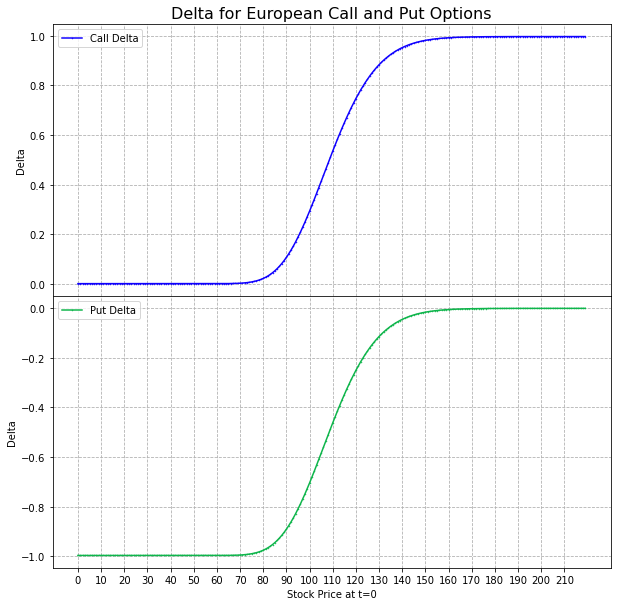

In [12]:
x = np.arange(0.00000001, 2*K, 1.)
y = delta_call(x, K, r, volatility, c, T)
z = delta_put(x, K, r, volatility, c, T)

fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=1, sharex=True, sharey=False)
fig.subplots_adjust(wspace=0, hspace=0)
axes[0].set_title('Delta for European Call and Put Options', fontsize=16)

axes[0].grid(visible=True, linestyle='--')
axes[0].set_xlabel('Stock Price at t=0')
axes[0].set_ylabel('Delta')
axes[0].set_xticks(np.arange(0, 2*K, 10.))
axes[0].plot(x, y, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='Call Delta')
axes[0].legend()

axes[1].grid(visible=True, linestyle='--')
axes[1].set_xlabel('Stock Price at t=0')
axes[1].set_ylabel('Delta')
axes[1].set_xticks(np.arange(0, 2*K, 10.))
axes[1].plot(x, z, marker='.', color='#0EB54B', markersize=1, linestyle='-', label='Put Delta')
axes[1].legend()

-----

In [13]:
def gamma_call(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    Qd1 = norm.pdf(d1)
    return np.exp(-c*T)*Qd1/(volatility*S0*np.sqrt(T))

def gamma_put(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    Qd1 = norm.pdf(d1)
    return np.exp(-c*T)*Qd1/(volatility*S0*np.sqrt(T))

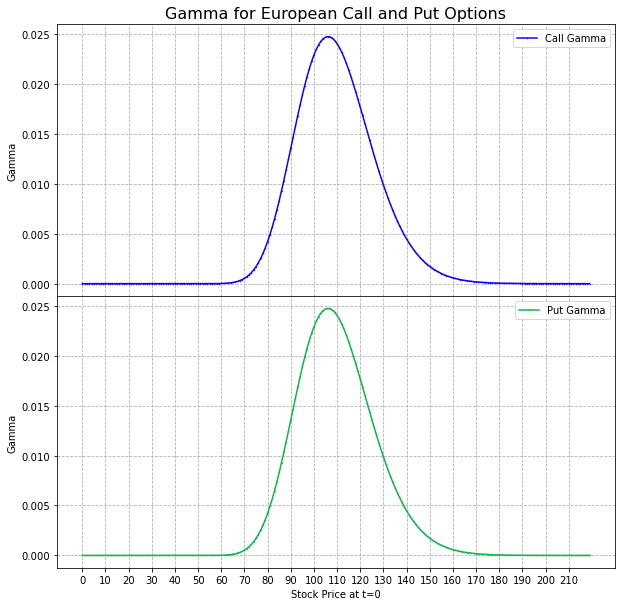

In [14]:
x = np.arange(0.00000001, 2*K, 1.)
y = gamma_call(x, K, r, volatility, c, T)
z = gamma_put(x, K, r, volatility, c, T)

fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=1, sharex=True, sharey=False)
fig.subplots_adjust(wspace=0, hspace=0)
axes[0].set_title('Gamma for European Call and Put Options', fontsize=16)

axes[0].grid(visible=True, linestyle='--')
axes[0].set_xlabel('Stock Price at t=0')
axes[0].set_ylabel('Gamma')
axes[0].set_xticks(np.arange(0, 2*K, 10.))
axes[0].plot(x, y, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='Call Gamma')
axes[0].legend()

axes[1].grid(visible=True, linestyle='--')
axes[1].set_xlabel('Stock Price at t=0')
axes[1].set_ylabel('Gamma')
axes[1].set_xticks(np.arange(0, 2*K, 10.))
axes[1].plot(x, z, marker='.', color='#0EB54B', markersize=1, linestyle='-', label='Put Gamma')
axes[1].legend()

-----

In [15]:
def vega_call(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    Qd1 = norm.pdf(d1)
    return np.exp(-c*T)*S0*np.sqrt(T)*Qd1

def vega_put(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    Qd1 = norm.pdf(d1)
    return np.exp(-c*T)*S0*np.sqrt(T)*Qd1

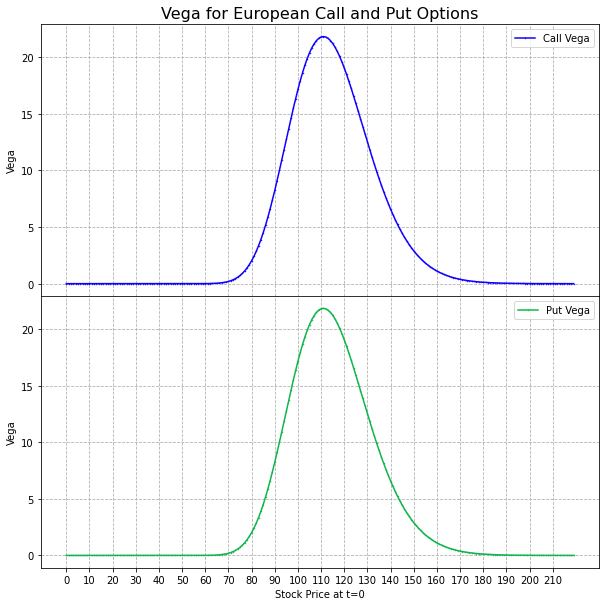

In [16]:
x = np.arange(0.00000001, 2*K, 1.)
y = vega_call(x, K, r, volatility, c, T)
z = vega_put(x, K, r, volatility, c, T)

fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=1, sharex=True, sharey=False)
fig.subplots_adjust(wspace=0, hspace=0)
axes[0].set_title('Vega for European Call and Put Options', fontsize=16)

axes[0].grid(visible=True, linestyle='--')
axes[0].set_xlabel('Stock Price at t=0')
axes[0].set_ylabel('Vega')
axes[0].set_xticks(np.arange(0, 2*K, 10.))
axes[0].plot(x, y, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='Call Vega')
axes[0].legend()

axes[1].grid(visible=True, linestyle='--')
axes[1].set_xlabel('Stock Price at t=0')
axes[1].set_ylabel('Vega')
axes[1].set_xticks(np.arange(0, 2*K, 10.))
axes[1].plot(x, z, marker='.', color='#0EB54B', markersize=1, linestyle='-', label='Put Vega')
axes[1].legend()

-----

In [17]:
def theta_call(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    d2 = d1 - volatility*np.sqrt(T)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    Qd1 = norm.pdf(d1)
    return -np.exp(-c*T)*S0*Qd1*volatility/(2*np.sqrt(T)) + c*np.exp(-c*T)*S0*Nd1 - r*K*np.exp(-r*T)*Nd2

def theta_put(S0, K, r, volatility, c, T):
    d1 = (np.log(S0/K) + (r-c+volatility**2/2)*T)/(volatility*np.sqrt(T))
    d2 = d1 - volatility*np.sqrt(T)
    N_d1 = norm.cdf(-d1)
    N_d2 = norm.cdf(-d2)
    Qd1 = norm.pdf(d1)
    return -np.exp(-c*T)*S0*Qd1*volatility/(2*np.sqrt(T)) - c*np.exp(-c*T)*S0*N_d1 + r*K*np.exp(-r*T)*N_d2

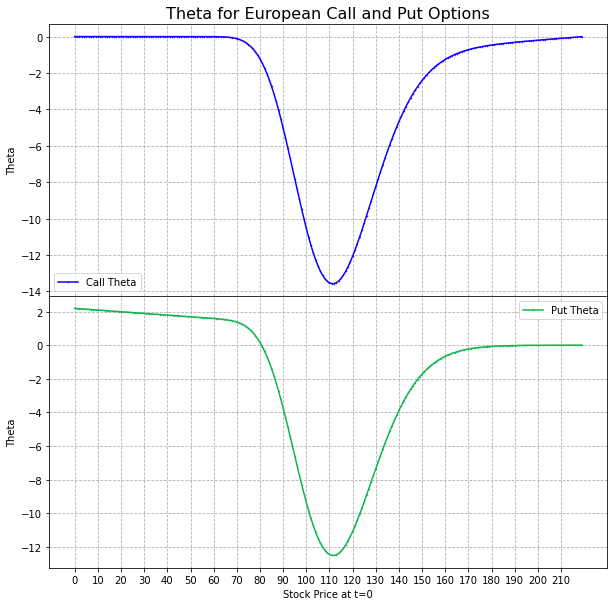

In [18]:
x = np.arange(0.00000001, 2*K, 1.)
y = theta_call(x, K, r, volatility, c, T)
z = theta_put(x, K, r, volatility, c, T)

fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=1, sharex=True, sharey=False)
fig.subplots_adjust(wspace=0, hspace=0)
axes[0].set_title('Theta for European Call and Put Options', fontsize=16)

axes[0].grid(visible=True, linestyle='--')
axes[0].set_xlabel('Stock Price at t=0')
axes[0].set_ylabel('Theta')
axes[0].set_xticks(np.arange(0, 2*K, 10.))
axes[0].plot(x, y, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='Call Theta')
axes[0].legend()

axes[1].grid(visible=True, linestyle='--')
axes[1].set_xlabel('Stock Price at t=0')
axes[1].set_ylabel('Theta')
axes[1].set_xticks(np.arange(0, 2*K, 10.))
axes[1].plot(x, z, marker='.', color='#0EB54B', markersize=1, linestyle='-', label='Put Theta')
axes[1].legend()